In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

from functools import partial

import warnings

In [2]:
df = pd.read_csv('data/netflix_titles.csv')

In [3]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [4]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [5]:
dfa = df.dropna()
dfa.reset_index(drop=True, inplace=True)

In [6]:
dfa.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
1,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
2,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [7]:
data = pd.read_csv("data/netflix.csv")
# Extract year from the 'Date' column
data['Year'] = pd.to_datetime(data['Date']).dt.year

# Merge df and data on 'release_year' in df and 'Year' in data
df = pd.merge(df, data, left_on='release_year', right_on='Year', how='left')

# Check the merged DataFrame
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date,High,Low,Open,Close,Volume,Adj Close,Year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2020-01-02,329.980011,324.779999,326.100006,329.809998,4485800.0,329.809998,2020.0
1,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2020-01-03,329.859985,325.529999,326.779999,325.899994,3806900.0,325.899994,2020.0
2,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2020-01-06,336.359985,321.200012,323.119995,335.829987,5663100.0,335.829987,2020.0
3,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2020-01-07,336.700012,330.299988,336.470001,330.750000,4703200.0,330.750000,2020.0
4,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2020-01-08,342.700012,331.049988,331.489990,339.260010,7104500.0,339.260010,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026512,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2015-12-24,118.800003,117.300003,118.220001,117.330002,3531300.0,117.330002,2015.0
2026513,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2015-12-28,117.349998,113.849998,117.260002,117.110001,8424300.0,117.110001,2015.0
2026514,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2015-12-29,119.599998,116.919998,118.190002,119.120003,8159200.0,119.120003,2015.0
2026515,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2015-12-30,119.019997,116.430000,118.949997,116.709999,8149700.0,116.709999,2015.0


<Figure size 1000x600 with 0 Axes>

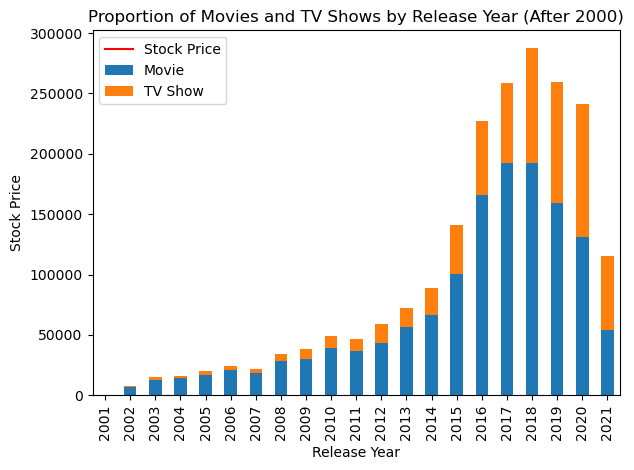

In [18]:
# Filter the DataFrame to include only years after 2000
df_filtered = df[df['release_year'] > 2000]

# Group the filtered data by release_year and type, and count the occurrences
grouped = df_filtered.groupby(['release_year', 'type']).size().unstack()

# Plot the histogram
plt.figure(figsize=(10, 6))
grouped.plot(kind='bar', stacked=True)
plt.title('Proportion of Movies and TV Shows by Release Year (After 2000)')
plt.xlabel('Release Year')
plt.ylabel('Count')

# Plot the stock price curve
plt.plot(data['Year'], data['Adj Close'], color='red', label='Stock Price')
plt.ylabel('Stock Price')
plt.legend(loc='upper left')

# Adjust layout
plt.tight_layout()
plt.show()

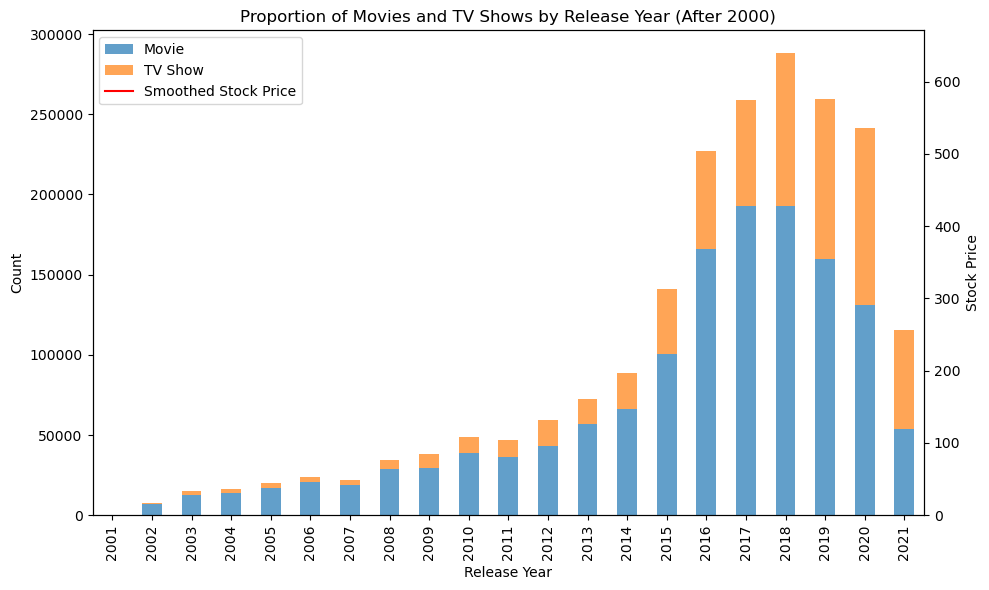

In [14]:
# Plot both the stacked bar chart and the smoothed stock price curve on the same graph with a secondary y-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the stacked bar chart with increased transparency
grouped.plot(kind='bar', stacked=True, ax=ax1, alpha=0.7)
ax1.set_title('Proportion of Movies and TV Shows by Release Year (After 2000)')
ax1.set_xlabel('Release Year')
ax1.set_ylabel('Count')

# Create a secondary y-axis for the smoothed stock price
ax2 = ax1.twinx()
ax2.plot(df['Year'], df['Adj Close'], color='red', label='Smoothed Stock Price')
ax2.set_ylabel('Stock Price')

# Set y-axis limits for the smoothed stock price
ax2.set_ylim(bottom=0)  # Adjust the bottom limit if needed

# Show legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Adjust layout
plt.tight_layout()
plt.show()

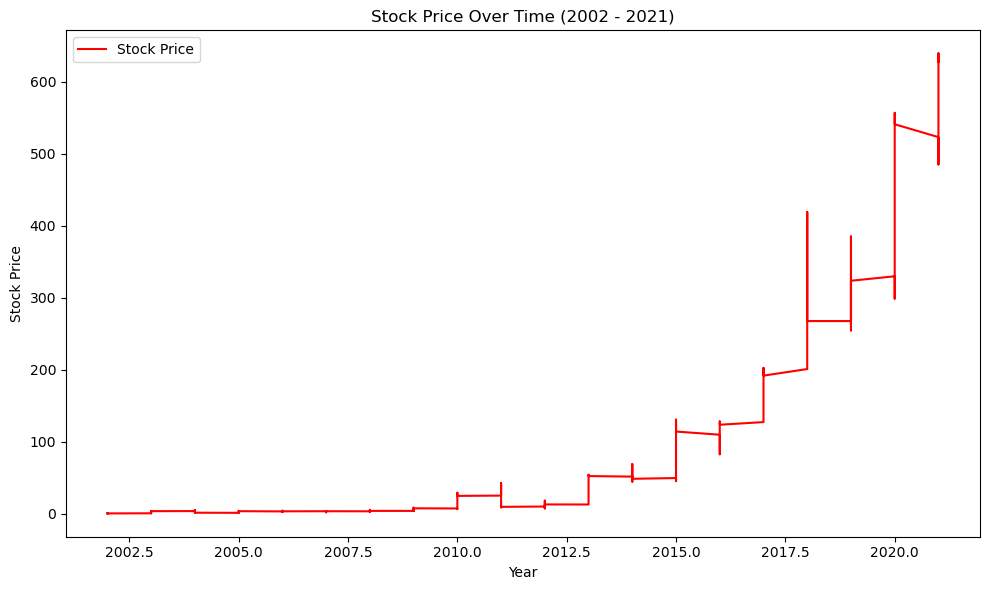

In [11]:
# Plot the stock price curve
plt.figure(figsize=(10, 6))
plt.plot(data['Year'], data['Adj Close'], color='red', label='Stock Price')
plt.title('Stock Price Over Time (2002 - 2021)')
plt.xlabel('Year')
plt.ylabel('Stock Price')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [9]:
dfc = df.dropna(subset=['country']).copy()
dfc.reset_index(drop=True, inplace=True)

In [10]:
dfc.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [199]:
# Extract the first term from the country column
dfc['first_term'] = dfc['country'].apply(lambda x: x.split(',')[0].strip())

# Print the unique country names extracted from the first term
unique_countries = dfc['first_term'].unique()
len(unique_countries)

86

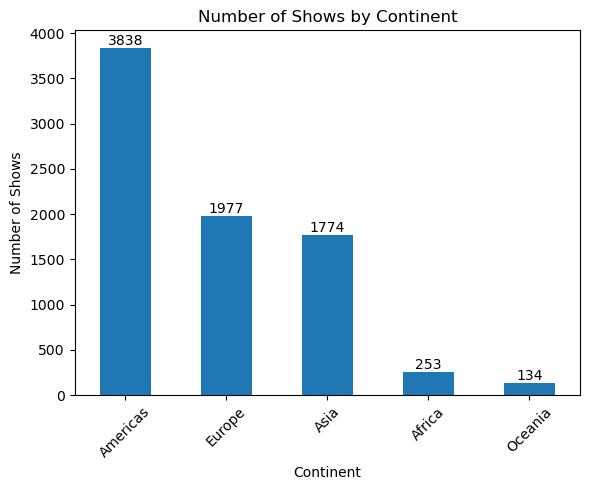

In [155]:
# Function to map countries to continents (Americas or Other)
def map_country_to_continent(country):
    first_term = country.split(',')[0].strip()  # Extract the first term and remove any leading/trailing whitespace
    if first_term in ['United States', 'Mexico', 'Canada', 'Brazil', 'Argentina', 'Colombia', 'Chile']:
        return 'Americas'
    elif first_term in ['India', 'China', 'Japan', 'South Korea', 'Turkey', 'Indonesia']:
        return 'Asia'
    elif first_term in ['South Africa', 'Nigeria', 'Egypt', 'Kenya', 'Morocco']:
        return 'Africa'
    elif first_term in ['Australia', 'New Zealand']:
        return 'Oceania'
    else:
        return 'Europe'

# Apply the mapping function to create a new column 'continent'
dfc['continent'] = dfc['country'].apply(map_country_to_continent)

# Group the data by continent and count the occurrences
continent_counts = dfc['continent'].value_counts()

# Plot the histogram
plt.figure(figsize=(6, 5))
ax = continent_counts.plot(kind='bar')
plt.title('Number of Shows by Continent')
plt.xlabel('Continent')
plt.ylabel('Number of Shows')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Annotate each bar with its value
for i, count in enumerate(continent_counts):
    plt.annotate(str(count), xy=(i, count), ha='center', va='bottom')

plt.tight_layout()

# Save the figure as a PDF file
plt.savefig('figures/Number_of_Shows_by_Continent.pdf')

plt.show()

In [48]:
# Filter out the row where duration is null
dfd = df.dropna(subset=['duration']).copy()
dfd.reset_index(drop=True, inplace=True)

dfd.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [178]:
# Divide the DataFrame into movies and TV shows
df_movie = dfd[dfd['type'] == "Movie"]
df_TV = dfd[dfd['type'] == "TV Show"]

In [179]:
df_movie['duration'].str.extract('(\d+)').astype(float).max()

0    312.0
dtype: float64

In [180]:
df_movie['duration'].str.extract('(\d+)').astype(float).min()

0    3.0
dtype: float64

In [181]:
df_TV['duration'].str.extract('(\d+)').astype(float).max()

0    17.0
dtype: float64

In [182]:
df_TV['duration'].str.extract('(\d+)').astype(float).min()

0    1.0
dtype: float64

In [191]:
df_movie = dfd[dfd['type'] == "Movie"]
df_TV = dfd[dfd['type'] == "TV Show"]

# Extract numeric duration for movies
df_movie['duration'] = df_movie['duration'].str.extract('(\d+)').astype(float)

# Extract numeric duration for TV shows
df_TV['duration'] = df_TV['duration'].str.extract('(\d+)').astype(float)

# Filter data for the years between 2001 and 2021
def create_year_dataframes(df_porduction):
    """
    Create DataFrames for each year from 2001 to 2021.

    Args:
        df_movie (DataFrame): DataFrame containing data.

    Returns:
        dict: Dictionary containing DataFrames for each year.
    """
    year_dataframes = {}
    for year in range(2001, 2022, 2):
        year_dataframes[year] = df_porduction[df_porduction['release_year'] == year]
    return year_dataframes

# Create DataFrames for each year from 2001 to 2021
df_movie_year = create_year_dataframes(df_movie)
df_TV_year = create_year_dataframes(df_TV)

/tmp/ipykernel_96/985439542.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['duration'] = df_movie['duration'].str.extract('(\d+)').astype(float)
/tmp/ipykernel_96/985439542.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_TV['duration'] = df_TV['duration'].str.extract('(\d+)').astype(float)


/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/opt/conda/lib/python3.11/site-packages/seaborn/categorical.

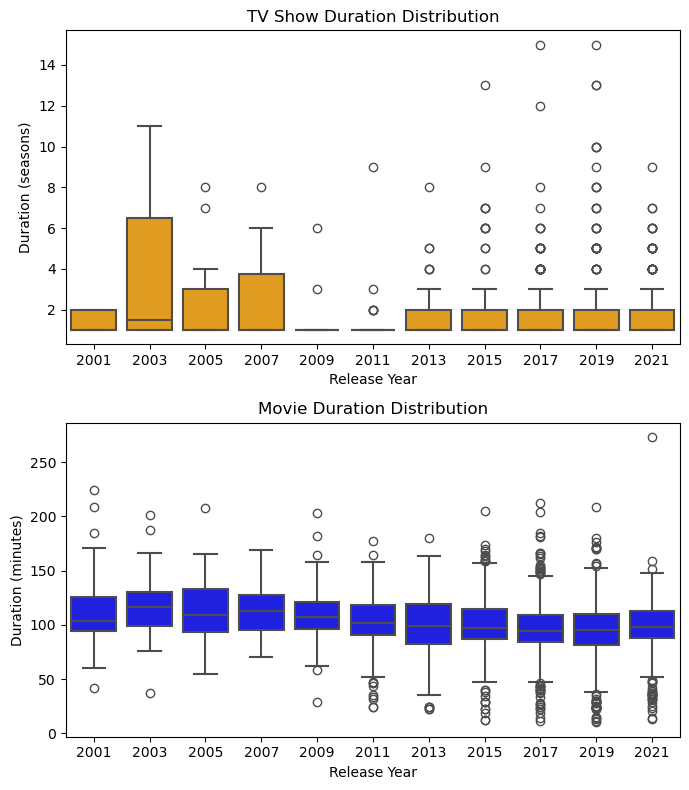

In [194]:
# Create a figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(7, 8))

def draw_boxplots(df_year,i,color):
    # draw boxplots for each dataframe
    for year in range(2001, 2022, 2):
        sns.boxplot(x='release_year', y='duration', data=df_year[year], ax=axes[i], color=color,linewidth=1.5)
    return

# Draw boxplots for TV shows in 2001 and 2021
draw_boxplots(df_TV_year,0,'orange')

# Set titles and labels for TV shows
axes[0].set_title('TV Show Duration Distribution')
axes[0].set_ylabel('Duration (seasons)')
axes[0].set_xlabel('Release Year')

# Draw boxplots for movies in 2001 and 2021
draw_boxplots(df_movie_year,1,'blue')

# Set titles and labels for movies
axes[1].set_title('Movie Duration Distribution')
axes[1].set_ylabel('Duration (minutes)')
axes[1].set_xlabel('Release Year')

# Adjust layout
plt.tight_layout()

# Save the plots as a PDF file
plt.savefig('figures/duration_distribution.pdf')

# Show plots
plt.show()

In [130]:
dfa['rating'].unique()

array(['TV-MA', 'TV-14', 'PG-13', 'PG', 'R', 'TV-PG', 'G', 'TV-Y7',
       'TV-G', 'TV-Y', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [131]:
# Filter out the row where rating is null
dfr = df.dropna(subset=['rating']).copy()
dfr.reset_index(drop=True, inplace=True)

dfr.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


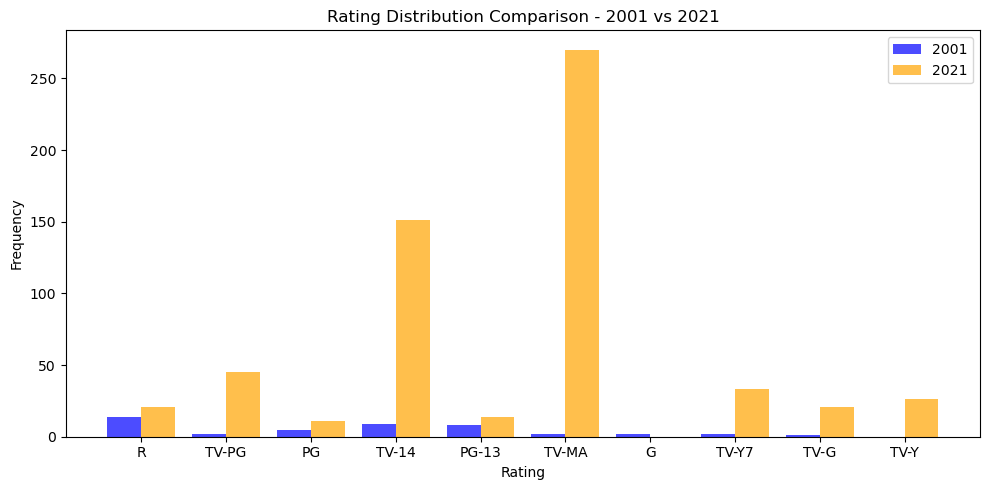

In [151]:
# Filter data for the years 2001 and 2021
df_2001 = dfr[dfr['release_year'] == 2001]['rating']
df_2021 = dfr[dfr['release_year'] == 2021]['rating']

# Create bins for the histogram
bins = np.arange(0, 11, 1)

# Plot histograms side by side
plt.figure(figsize=(10, 5))
plt.hist([df_2001, df_2021], bins=bins, color=['blue', 'orange'], alpha=0.7, label=['2001', '2021'],align='left')

# Add labels and title
plt.title('Rating Distribution Comparison - 2001 vs 2021')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend()

# Remove grid lines
plt.grid(False)

# Adjust layout
plt.tight_layout()

# Save the plots as a PDF file
plt.savefig('figures/rating_distribution.pdf')

# Show plot
plt.show()